<h2>Seminar 2020 - MultiThread & Pandas</h2>

In [1]:
### import section ###
from Utils.Preprocess import Preprocess
from Algorithm.ThreadManager import ThreadManager
from Utils.Log import writer, logger
from Utils.FileUtils import FileUtils
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from Algorithm import Model
%matplotlib inline

In [10]:
# change logger severity
logger.set_logger_severity('debug')

2020-03-18 19:33:18,740 Change level from DEBUG to INFO


In [11]:
headers = ['Id', 'OverallQual', 'YearBuilt', 'OverallCond', 'OpenPorchSF']
df1 = FileUtils.read_data_frame_from_path('Data/train_1.csv', headers)
df2 = FileUtils.read_data_frame_from_path('Data/train_2.xlsx', headers)
df3 = FileUtils.read_data_frame_from_path('Data/train_targets.csv')
df_total = df1.append(df2).merge(df3, on='Id', how='left')
pp = Preprocess(df_total, 'SalePrice')
mean_df = Preprocess.replace_nan(pp)
X_train, X_test, y_train, y_test = pp.split_train_test_by_pandas()

In [12]:
params = [{'model': SVC, "C": 0.4}, {'normalize': False, "fit_intercept": False},
          {'normalize': True, "fit_intercept": False}, {'model': SVC, "degree": 4},
          {'model': DecisionTreeRegressor}]
ThreadManager.running_threads_args(X_train, y_train, X_test, y_test, params)
ThreadManager.wait_for_all_threads()
best_params, best_result = ThreadManager.return_best_score()
writer.info(f'The best score is {best_result} with these params: {best_params}')

2020-03-18 19:33:24,502 The best score is 1969209681.4041615 with these params: LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)


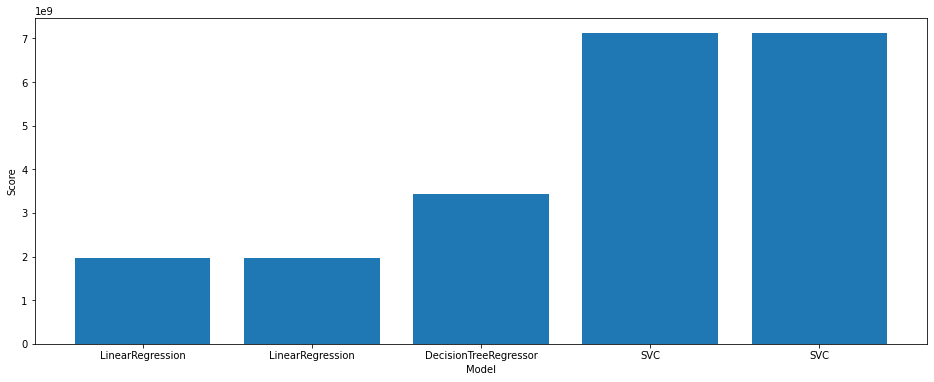

In [5]:
y_label = [item.score for item in ThreadManager.results]
x_label = np.arange(len(y_label))
models_labels = [Model.get_model_name(clf) for clf in ThreadManager.results]
plt.figure(figsize=(16,6))
plt.bar(x_label, y_label)
plt.xticks(range(len(models_labels)), models_labels)
plt.xlabel("Model")
plt.ylabel("Score")
plt.show()
ThreadManager.reset_values()